In [3]:
import torch as tp 
import torch.nn as nn 

class Model(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.linear=nn.Linear(num_features,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,features):
        out=self.linear(features)
        out=self.sigmoid(out)

        return out 

In [4]:
features=tp.rand(10,5)
model=Model(features.shape[1])
model(features)

tensor([[0.5795],
        [0.5391],
        [0.5503],
        [0.5024],
        [0.6126],
        [0.5400],
        [0.5615],
        [0.6360],
        [0.5853],
        [0.6131]], grad_fn=<SigmoidBackward0>)

In [6]:
model.linear.weight

Parameter containing:
tensor([[-0.0909,  0.1540, -0.2010, -0.3376,  0.4424]], requires_grad=True)

In [8]:
from torchinfo import summary
summary(model,input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [11]:
import torch 
import torch.nn as nn 

class SimpleModel(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.network=nn.Sequential(
            # Input Hidden layer
            nn.Linear(num_features,3),
            # Activation Function
            nn.ReLU(),
            # Hidden -> Output 
            nn.Linear(3,1),
            #probability
            nn.Sigmoid()
        )

    def forward(self,features):
        out=self.network(features)

        return out 

In [12]:
features=torch.rand(10,5)
model=SimpleModel(features.shape[1])
model(features)

tensor([[0.3775],
        [0.3748],
        [0.3751],
        [0.3745],
        [0.3755],
        [0.3717],
        [0.3715],
        [0.3727],
        [0.3738],
        [0.3741]], grad_fn=<SigmoidBackward0>)

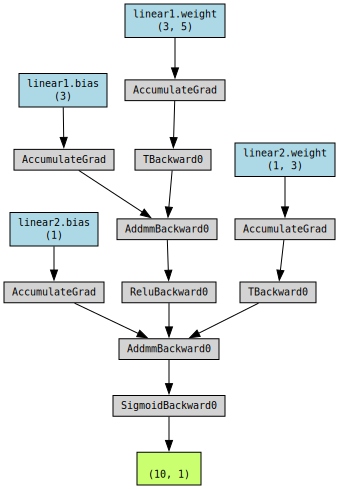

In [3]:
import torch
from torchviz import make_dot
import torch.nn as nn

class SimpleModel1(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(num_features, 3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

# dummy input
features = torch.rand(10, 5)

# model
model = SimpleModel1(5)

# forward pass
output = model(features)

# create graph
graph = make_dot(output, params=dict(model.named_parameters()))

graph


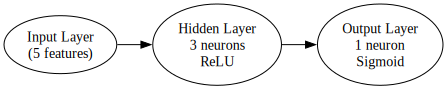

In [4]:
from graphviz import Digraph

dot = Digraph(format="png")
dot.attr(rankdir="LR")

# Layers
dot.node("Input", "Input Layer\n(5 features)")
dot.node("Hidden", "Hidden Layer\n3 neurons\nReLU")
dot.node("Output", "Output Layer\n1 neuron\nSigmoid")

# Connections
dot.edge("Input", "Hidden")
dot.edge("Hidden", "Output")

dot
